결정트리
==
데이터
--
- 붓꽃(iris) 분류 데이터


![붓꽃](https://www.dropbox.com/s/jfep97cix2ajukk/ml-2.png?raw=1)

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:, :2] 
y = iris.target

In [2]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

결정 트리 그리기 (옵션)
--

Graphbiz 설치
--

- graphviz.org 사이트에서 다운로드 후 설치
- 윈도우 버전:
- https://graphviz.gitlab.io/_pages/Download/Download_windows.html

In [9]:
# !pip install graphviz

In [10]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    clf,
    out_file = "./data/iris.dot",
    feature_names = iris.feature_names[:2],
    class_names = iris.target_names,
    filled = True
    )

## 윈도우에서
 dot_graph = f.read()  부분은 아래로 변경  
 dot_graph = str(open(＂./data/iris.dot＂, ＂rb＂).read(), ＂utf8＂)

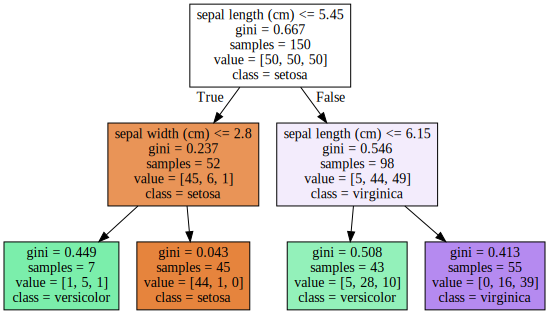

In [11]:
with open("./data/iris.dot") as f:
    dot_graph = str(open("./data/iris.dot", "rb").read(), "utf8")
    
graphviz.Source(dot_graph)

결정 경계선 그리기
--

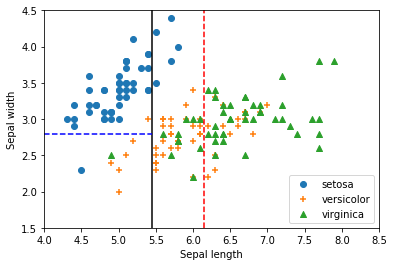

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)

markers = ['o', '+', '^']
for i in range(3):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])

plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


# 결정 트리 경계선: 실선은 루트 노드 점선은 자식 노드
xx = np.linspace(5.45, 5.45, 20)
yy = np.linspace(1.5, 4.5, 20)
plt.plot(xx, yy, '-k') # 검정색 실선

xx = np.linspace(4, 5.45, 20)
yy = np.linspace(2.8, 2.8, 20)
plt.plot(xx, yy, '--b') # 파란색 점선

xx = np.linspace(6.15, 6.15, 20)
yy = np.linspace(1.5, 4.5, 20)
plt.plot(xx, yy, '--r') # 붉은색 점선


In [13]:
print(clf.predict([[5.5, 4]]))

[1]


In [14]:
print(clf.predict_proba([[5.5, 4]]))

[[0.11627907 0.65116279 0.23255814]]
